In [20]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import os
import seaborn as sns

In [80]:
log_path = '/home/cdq/FedPet/log/yahoo/all_100/seed_42/pattern_0/alpha_0_beta_0_gamma_1/fedclassifier_1024_32.log'
csv_path = 'yahoo_all_100_alpha_0_beta_0_gamma_1_1024_32.csv'
labeled_csv_path = 'labeled_' + csv_path

label = range(10)

origin_phrase = "Origin client distribution: Example distribution in the original dataset:"
labeled_phrase = "Labeled client distribution: Example distribution in the original dataset:"
with open(log_path) as f:
    f = f.readlines()

origin_df = pd.DataFrame(data=None,columns=label)
labeled_df = pd.DataFrame(data=None,columns=label)

origin_client = 0
labeled_client = 0
for line in f:
    if origin_phrase in line:
        label_distribution = [int(x) for x in re.findall(r'\[.*\]', line)[0].split('[')[2].split(']')[0].split(',')]  
        origin_df.loc[origin_client] = label_distribution
        origin_client = origin_client + 1
    if labeled_phrase in line:
        label_distribution = [int(x) for x in re.findall(r'\[.*\]', line)[0].split('[')[2].split(']')[0].split(',')]  
        labeled_df.loc[labeled_client] = label_distribution
        labeled_client = labeled_client + 1

In [ ]:
root_path = '/dssg/home/scs2010814159/cdq/FedPet'
dataset = 'yahoo'
method = 'fedpet'
all_clients = 1000
clients = 32 # labeled 
seed = 42
pattern_id = 0
alpha = 1
beta = 0
gammas = [0.001, 0.01, 0.1, 1, 10, 100]
train_samples = [2 ** n for n in range(5,11)]

for gamma in gammas:
    log_path = os.path.join(root_path, 'log', dataset, f'all_{all_clients}', f'seed_{seed}', f'pattern_{pattern_id}', f'alpha_{alpha}_beta_{beta}_gamma_{gamma}')
    csv_path = os.path.join(root_path, 'data', dataset, f'all_{all_clients}', f'seed_{seed}', f'pattern_{pattern_id}', f'alpha_{alpha}_beta_{beta}_gamma_{gamma}')
    os.system(f'mkdir -p {log_path}')
    os.system(f'mkdir -p {csv_path}')
    
    for train_sample in train_samples:
        file_name = method + '_' + str(train_sample) + '_' + str(clients) + '.log'
        csv_name = method + '_' + str(train_sample) + '_' + str(clients) + '.csv'
        labeled_csv_name = 'labeled' + method + '_' + str(train_sample) + '_' + str(clients) + '.csv'
        path = os.path.join(log_path, file_name) 
        csv = os.path.join(csv_path, csv_name)
        labeled_csv = os.path.join(csv_path, labeled_csv_name)

        print(path)

        label = range(10)

        origin_phrase = "Origin client distribution: Example distribution in the original dataset:"
        labeled_phrase = "Labeled client distribution: Example distribution in the original dataset:"
        with open(path) as f:
            f = f.readlines()

        origin_df = pd.DataFrame(data=None,columns=label)
        labeled_df = pd.DataFrame(data=None,columns=label)

        origin_client = 0
        labeled_client = 0
        for line in f:
            if origin_phrase in line:
                label_distribution = [int(x) for x in re.findall(r'\[.*\]', line)[0].split('[')[2].split(']')[0].split(',')]  
                origin_df.loc[origin_client] = label_distribution
                origin_client = origin_client + 1
            if labeled_phrase in line:
                print(line)
                label_distribution = [int(x) for x in re.findall(r'\[.*\]', line)[0].split('[')[2].split(']')[0].split(',')]  
                labeled_df.loc[labeled_client] = label_distribution
                labeled_client = labeled_client + 1
        origin_df.to_csv(csv)
        labeled_df.to_csv(labeled_csv)

In [81]:
origin_df.to_csv(csv_path)
labeled_df.to_csv(labeled_csv_path)
labeled_df

,0,1,2,3,4,5,6,7,8,9
0,0,2,1,2,1,1,1,4,6,1
1,11,12,13,9,14,13,12,11,14,10
2,3,8,1,7,6,4,4,9,5,5
3,2,2,6,3,4,2,3,3,5,6
4,0,0,0,1,0,2,0,2,0,2
5,0,1,0,1,1,0,2,0,1,1
6,0,0,1,0,0,0,0,1,1,0
7,5,7,7,8,7,10,11,12,8,4
8,4,5,4,3,1,5,4,4,4,3
9,9,2,3,4,7,5,6,3,7,3


In [23]:
origin_df = origin_df / origin_df.sum().sum()

TypeError: Image data of dtype object cannot be converted to float

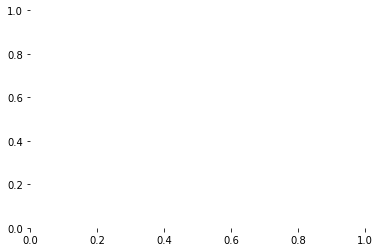

In [54]:
origin_df
sns_plot = sns.heatmap(origin_df,annot= True)

In [46]:
df = float(origin_df)
xaxis = [str(sample) for sample in df.columns]
yaxis = [str(client) for client in df.index]

tc = df

fig = plt.figure()
plt.title('Origin',fontsize=20)
# 设置刻度字体大小
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

sns_plot = sns.heatmap(df,cmap= "YlGnBu",annot= True) # , vmax=max_acc[dataset]

sns_plot.set(xlabel="# Samples per client", ylabel="# Clients")

# fig.savefig("./test.pdf", bbox_inches='tight') # 减少边缘空白

TypeError: float() argument must be a string or a number, not 'DataFrame'

In [14]:
text = 'Example distribution in the original dataset: [16, 15, 16, 11]'
gen = [int(x) for x in re.findall(r'\[.*\]', text)[0].split('[')[1].split(']')[0].split(',')]
gen

[16, 15, 16, 11]